In [180]:
%matplotlib notebook

In [181]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from functools import reduce

In [182]:
#Take in data and read csv files

#May 2019
zone1_may2019 = "Resources/raw_zones_data/zone1_may2019.csv"
zone2_may2019 = "Resources/raw_zones_data/zone2_may2019.csv"
zone3_may2019 = "Resources/raw_zones_data/zone3_may2019.csv"
zone4_may2019 = "Resources/raw_zones_data/zone4_may2019.csv"
zone5_may2019 = "Resources/raw_zones_data/zone5_may2019.csv"
zone6_may2019 = "Resources/raw_zones_data/zone6_may2019.csv"


#Read May 2019 Data File and store into Pandas DataFrames
zone1_may2019 = pd.read_csv(zone1_may2019)
zone2_may2019 = pd.read_csv(zone2_may2019)
zone3_may2019 = pd.read_csv(zone3_may2019)
zone4_may2019 = pd.read_csv(zone4_may2019)
zone5_may2019 = pd.read_csv(zone5_may2019)
zone6_may2019 = pd.read_csv(zone6_may2019)

#zone1_may2019


In [183]:
#groupby 2019 crime type
#zone1
zone1_2019 = zone1_may2019[['UC2_Literal']]
zone1_crime_type_2019 = zone1_may2019.groupby(['UC2_Literal'])
zone1_total_crimes = zone1_crime_type_2019['Report Number'].count()

#zone2
zone2_2019 = zone2_may2019[['UC2_Literal']]
zone2_crime_type_2019 = zone2_may2019.groupby(['UC2_Literal'])
zone2_total_crimes = zone2_crime_type_2019['Report Number'].count()

#zone3
zone3_2019 = zone3_may2019[['UC2_Literal']]
zone3_crime_type_2019 = zone3_may2019.groupby(['UC2_Literal'])
zone3_total_crimes = zone3_crime_type_2019['Report Number'].count()

#zone4
zone4_2019 = zone4_may2019[['UC2_Literal']]
zone4_crime_type_2019 = zone4_may2019.groupby(['UC2_Literal'])
zone4_total_crimes = zone4_crime_type_2019['Report Number'].count()

#zone5
zone5_2019 = zone5_may2019[['UC2_Literal']]
zone5_crime_type_2019 = zone5_may2019.groupby(['UC2_Literal'])
zone5_total_crimes = zone5_crime_type_2019['Report Number'].count()

#zone6
zone6_2019 = zone6_may2019[['UC2_Literal']]
zone6_crime_type_2019 = zone6_may2019.groupby(['UC2_Literal'])
zone6_total_crimes = zone6_crime_type_2019['Report Number'].count()

#test print to confirm
zone6_total_crimes

UC2_Literal
AGG ASSAULT              18
AUTO THEFT               49
BURGLARY                 37
HOMICIDE                  1
LARCENY-FROM VEHICLE    199
LARCENY-NON VEHICLE     129
ROBBERY                  12
Name: Report Number, dtype: int64

In [184]:
#Creating a new DF with all zones for 2019
all_zones_2019 = pd.DataFrame ({"Zone1_19": zone1_total_crimes,
                               "Zone2_19": zone2_total_crimes,
                               "Zone3_19": zone3_total_crimes,
                               "Zone3_19": zone3_total_crimes,
                               "Zone4_19": zone4_total_crimes,
                               "Zone5_19": zone5_total_crimes,
                               "Zone6_19": zone6_total_crimes})

all_zones_2019.index.name = "Crime Type"

#remove NaN
all_zones_2019['Zone5_19']=all_zones_2019['Zone5_19'].fillna(0)

all_zones_2019

,Zone1_19,Zone2_19,Zone3_19,Zone4_19,Zone5_19,Zone6_19
Crime Type,,,,,,
AGG ASSAULT,53,16,54,46,34.0,18
AUTO THEFT,39,53,47,57,41.0,49
BURGLARY,54,41,68,63,21.0,37
HOMICIDE,2,2,1,2,0.0,1
LARCENY-FROM VEHICLE,113,159,79,94,214.0,199
LARCENY-NON VEHICLE,74,132,63,53,102.0,129
ROBBERY,38,9,8,21,20.0,12


In [185]:
#Take in data and read csv files

#May 2020
zone1_may2020 = "Resources/raw_zones_data/zone1_may2020.csv"
zone2_may2020 = "Resources/raw_zones_data/zone2_may2020.csv"
zone3_may2020 = "Resources/raw_zones_data/zone3_may2020.csv"
zone4_may2020 = "Resources/raw_zones_data/zone4_may2020.csv"
zone5_may2020 = "Resources/raw_zones_data/zone5_may2020.csv"
zone6_may2020 = "Resources/raw_zones_data/zone6_may2020.csv"


#Read May 2019 Data File and store into Pandas DataFrames
zone1_may2020 = pd.read_csv(zone1_may2020)
zone2_may2020 = pd.read_csv(zone2_may2020)
zone3_may2020 = pd.read_csv(zone3_may2020)
zone4_may2020 = pd.read_csv(zone4_may2020)
zone5_may2020 = pd.read_csv(zone5_may2020)
zone6_may2020 = pd.read_csv(zone6_may2020)

#zone1_may2020

In [186]:
#groupby 2020 crime type
#zone1
zone1_2020 = zone1_may2020[['UC2_Literal']]
zone1_crime_type_2020 = zone1_may2020.groupby(['UC2_Literal'])
zone1_total_crimes = zone1_crime_type_2020['Report Number'].count()

#zone2
zone2_2020 = zone2_may2020[['UC2_Literal']]
zone2_crime_type_2020 = zone2_may2020.groupby(['UC2_Literal'])
zone2_total_crimes = zone2_crime_type_2020['Report Number'].count()

#zone3
zone3_2020 = zone3_may2020[['UC2_Literal']]
zone3_crime_type_2020 = zone3_may2020.groupby(['UC2_Literal'])
zone3_total_crimes = zone3_crime_type_2020['Report Number'].count()

#zone4
zone4_2020 = zone4_may2020[['UC2_Literal']]
zone4_crime_type_2020 = zone4_may2020.groupby(['UC2_Literal'])
zone4_total_crimes = zone4_crime_type_2020['Report Number'].count()

#zone5
zone5_2020 = zone5_may2020[['UC2_Literal']]
zone5_crime_type_2020 = zone5_may2020.groupby(['UC2_Literal'])
zone5_total_crimes = zone5_crime_type_2020['Report Number'].count()

#zone6
zone6_2020 = zone6_may2020[['UC2_Literal']]
zone6_crime_type_2020 = zone6_may2020.groupby(['UC2_Literal'])
zone6_total_crimes = zone6_crime_type_2020['Report Number'].count()

#test print to confirm
zone6_total_crimes

UC2_Literal
AGG ASSAULT             111
AUTO THEFT              298
BURGLARY                125
LARCENY-FROM VEHICLE    385
LARCENY-NON VEHICLE     602
ROBBERY                  49
Name: Report Number, dtype: int64

In [187]:
#Creating a new DF with all zones for 2020
all_zones_2020 = pd.DataFrame ({"Zone1_20": zone1_total_crimes,
                               "Zone2_20": zone2_total_crimes,
                               "Zone3_20": zone3_total_crimes,
                               "Zone3_20": zone3_total_crimes,
                               "Zone4_20": zone4_total_crimes,
                               "Zone5_20": zone5_total_crimes,
                               "Zone6_20": zone6_total_crimes})

all_zones_2020.index.name = "Crime Type"

#remove NaN
all_zones_2020['Zone6_20']=all_zones_2020['Zone6_20'].fillna(0)

all_zones_2020.reset_index()

all_zones_2020

,Zone1_20,Zone2_20,Zone3_20,Zone4_20,Zone5_20,Zone6_20
Crime Type,,,,,,
AGG ASSAULT,390,118,340,350,230,111.0
AUTO THEFT,147,174,183,187,206,298.0
BURGLARY,174,581,307,267,278,125.0
HOMICIDE,7,7,7,27,7,0.0
LARCENY-FROM VEHICLE,210,387,321,328,497,385.0
LARCENY-NON VEHICLE,305,230,278,360,470,602.0
ROBBERY,62,55,71,83,91,49.0


<IPython.core.display.Javascript object>


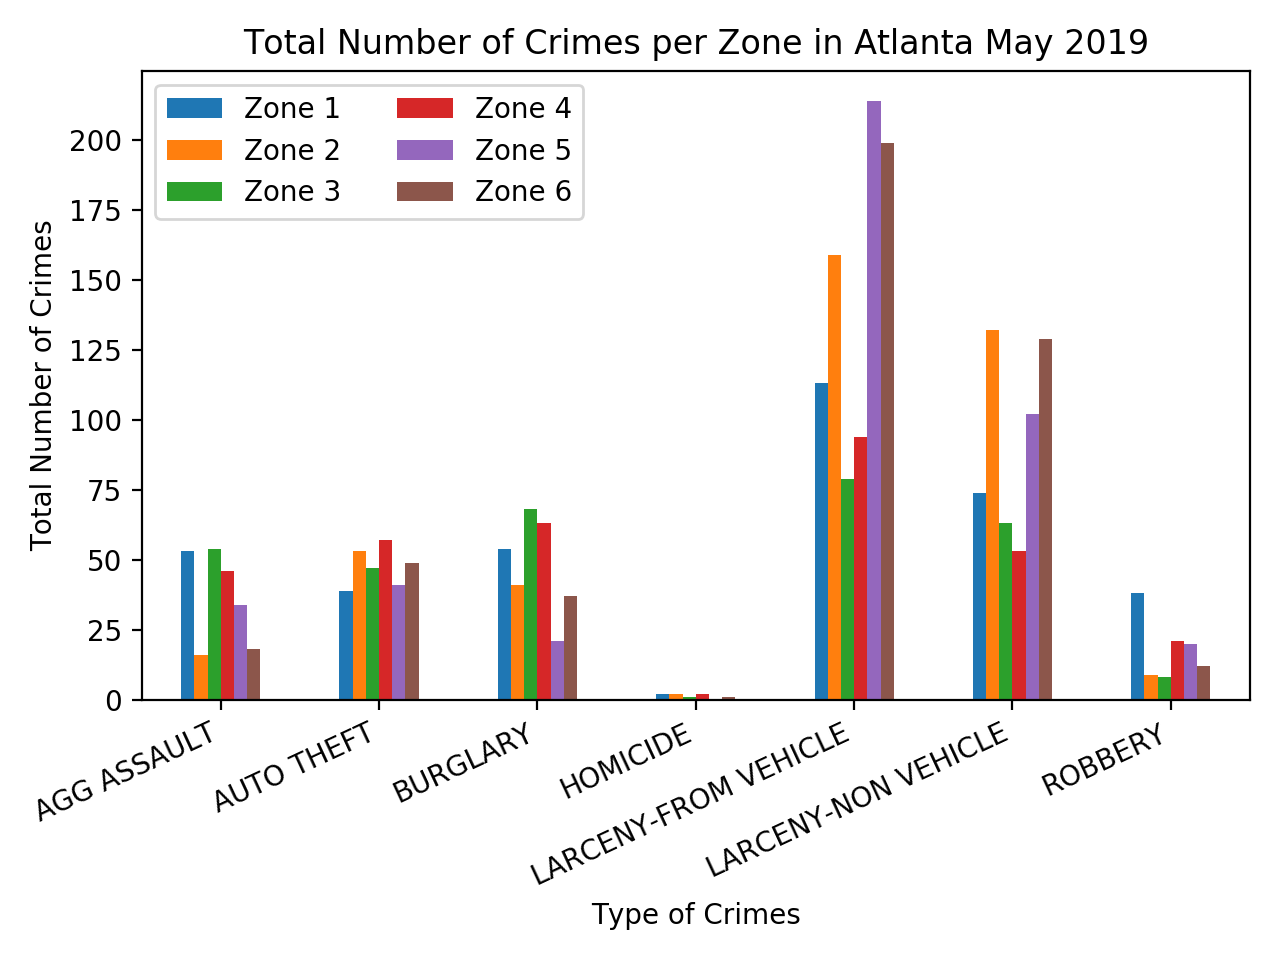

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

In [206]:
#Bar chart with zones May 2019
zones_may2019_chart = all_zones_2019.plot(kind='bar', rot=25)

#labels
zones_may2019_chart.set_xlabel("Type of Crimes")
zones_may2019_chart.set_ylabel("Total Number of Crimes")
zones_may2019_chart.set_title("Total Number of Crimes per Zone in Atlanta May 2019")


plt.show()
plt.tight_layout()
plt.gca().legend(["Zone 1", "Zone 2", "Zone 3", "Zone 4", "Zone 5", "Zone 6"],ncol =2);

plt.xticks(ha='right')

In [207]:
plt.savefig('lisa_images/crimeperzone_may2019.png')

plt.clf()
plt.cla()
plt.close()

<IPython.core.display.Javascript object>


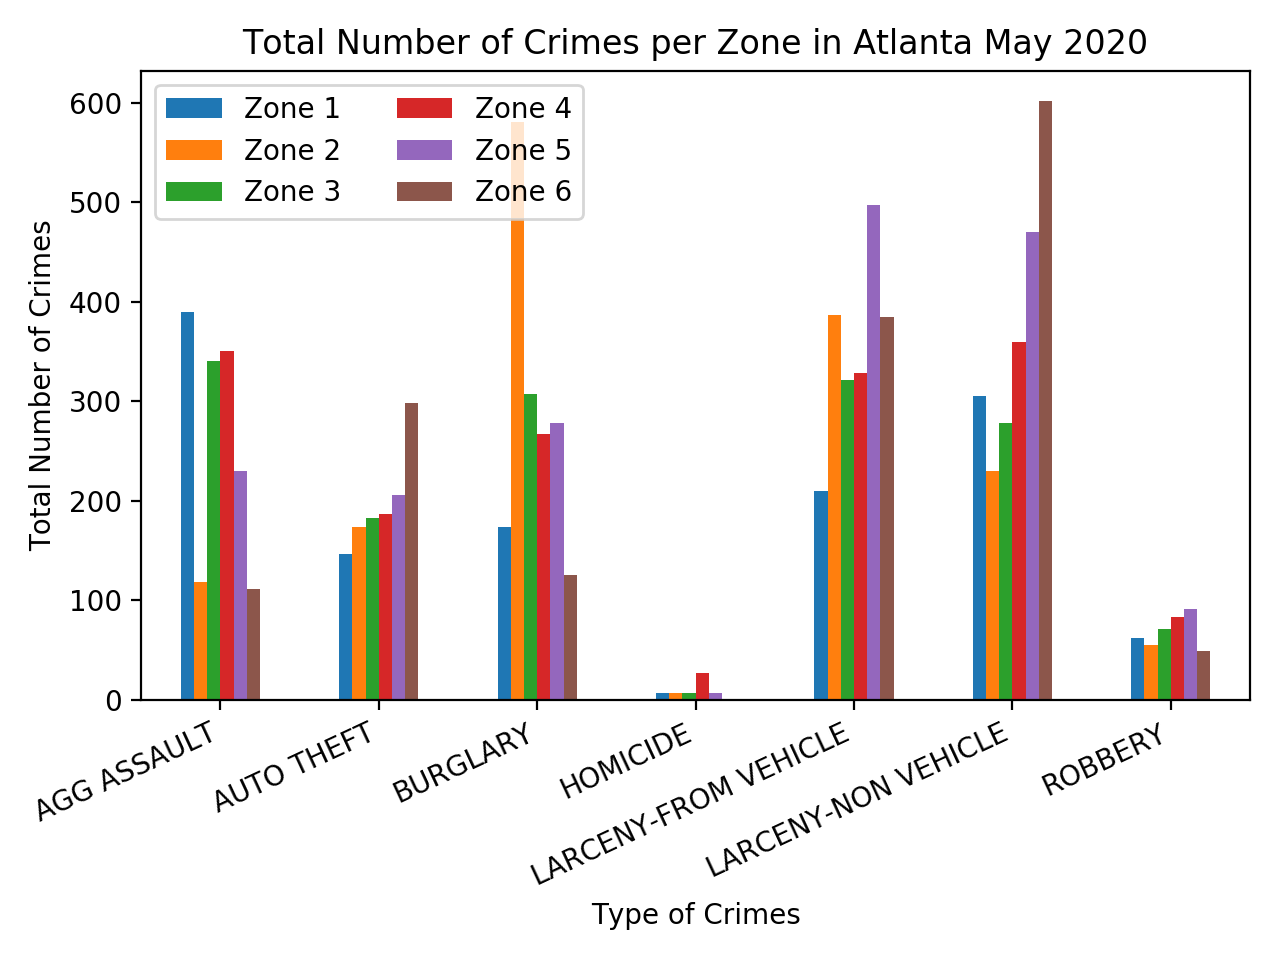

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

In [208]:
#Bar chart with zones May 2020
zones_may2020_chart = all_zones_2020.plot(kind='bar', rot=25, legend=False)

#labels
zones_may2020_chart.set_xlabel("Type of Crimes")
zones_may2020_chart.set_ylabel("Total Number of Crimes")
zones_may2020_chart.set_title("Total Number of Crimes per Zone in Atlanta May 2020")


plt.show()
plt.tight_layout()
plt.gca().legend(["Zone 1", "Zone 2", "Zone 3", "Zone 4", "Zone 5", "Zone 6"],ncol =2);

plt.xticks(ha='right')


In [209]:
plt.savefig('lisa_images/crimeperzone_may2020.png')

plt.clf()
plt.cla()
plt.close()

In [210]:
#combine May 2019 and May 2020 datasets for all zones
allzones_May2019_20 = pd.merge(all_zones_2019, all_zones_2020, how="outer", on=["Crime Type"])

allzones_May2019_20

,Zone1_19,Zone2_19,Zone3_19,Zone4_19,Zone5_19,Zone6_19,Zone1_20,Zone2_20,Zone3_20,Zone4_20,Zone5_20,Zone6_20
Crime Type,,,,,,,,,,,,
AGG ASSAULT,53,16,54,46,34.0,18,390,118,340,350,230,111.0
AUTO THEFT,39,53,47,57,41.0,49,147,174,183,187,206,298.0
BURGLARY,54,41,68,63,21.0,37,174,581,307,267,278,125.0
HOMICIDE,2,2,1,2,0.0,1,7,7,7,27,7,0.0
LARCENY-FROM VEHICLE,113,159,79,94,214.0,199,210,387,321,328,497,385.0
LARCENY-NON VEHICLE,74,132,63,53,102.0,129,305,230,278,360,470,602.0
ROBBERY,38,9,8,21,20.0,12,62,55,71,83,91,49.0


In [246]:
#Calculate Percent increase or decrease for each crime type per zone
#sort by most to lease and graph on bar

per_diff = allzones_May2019_20

#Percent increase per zone
zone1 = ((per_diff['Zone1_20']-per_diff['Zone1_19'])/(per_diff['Zone1_20']+per_diff['Zone1_19']))*100
zone2 = ((per_diff['Zone2_20']-per_diff['Zone2_19'])/(per_diff['Zone2_20']+per_diff['Zone2_19']))*100
zone3 = ((per_diff['Zone3_20']-per_diff['Zone3_19'])/(per_diff['Zone3_20']+per_diff['Zone3_19']))*100
zone4 = ((per_diff['Zone4_20']-per_diff['Zone4_19'])/(per_diff['Zone4_20']+per_diff['Zone4_19']))*100
zone5 = ((per_diff['Zone5_20']-per_diff['Zone5_19'])/(per_diff['Zone5_20']+per_diff['Zone5_19']))*100
zone6 = ((per_diff['Zone6_20']-per_diff['Zone6_19'])/(per_diff['Zone6_20']+per_diff['Zone6_19']))*100

per_diff = pd.DataFrame ({"Zone 1":zone1,
                          "Zone 2":zone2,
                          "Zone 3":zone3,
                          "Zone 4":zone4,
                          "Zone 5":zone5,
                          "Zone 6":zone6})

per_diff.index.name = "Crime Type"

per_diff


,Zone 1,Zone 2,Zone 3,Zone 4,Zone 5,Zone 6
Crime Type,,,,,,
AGG ASSAULT,76.072235,76.119403,72.588832,76.767677,74.242424,72.093023
AUTO THEFT,58.064516,53.303965,59.130435,53.278689,66.801619,71.757925
BURGLARY,52.631579,86.816720,63.733333,61.818182,85.953177,54.320988
HOMICIDE,55.555556,55.555556,75.000000,86.206897,100.000000,-100.000000
LARCENY-FROM VEHICLE,30.030960,41.758242,60.500000,55.450237,39.803094,31.849315
LARCENY-NON VEHICLE,60.949868,27.071823,63.049853,74.334140,64.335664,64.705882
ROBBERY,24.000000,71.875000,79.746835,59.615385,63.963964,60.655738


In [247]:
#remove Homicide
per_diff = per_diff.drop('HOMICIDE')
per_diff

,Zone 1,Zone 2,Zone 3,Zone 4,Zone 5,Zone 6
Crime Type,,,,,,
AGG ASSAULT,76.072235,76.119403,72.588832,76.767677,74.242424,72.093023
AUTO THEFT,58.064516,53.303965,59.130435,53.278689,66.801619,71.757925
BURGLARY,52.631579,86.816720,63.733333,61.818182,85.953177,54.320988
LARCENY-FROM VEHICLE,30.030960,41.758242,60.500000,55.450237,39.803094,31.849315
LARCENY-NON VEHICLE,60.949868,27.071823,63.049853,74.334140,64.335664,64.705882
ROBBERY,24.000000,71.875000,79.746835,59.615385,63.963964,60.655738


#per_diff_index = per_diff
per_diff_index['index_col'] = per_diff_index.index
#per_diff_index.set_index('index_col', inplace = False)

per_diff_index

In [235]:
#switching DF to foucus on zones

zones_df = pd.DataFrame(dict(
        Zones='Zone 1; Zone 2; Zone 3; Zone 4; Zone 5; Zone 6'.split(';'),
        Agg_Assault=[76.07, 76.12, 72.59, 76.77, 74.24, 72.09],
        Auto_Theft=[58.06,53.30,59.13,53.28,66.80,71.76],
        Burglary=[53.63,86.82,63.73,61.82,85.95,54.32],
        Larceny_Vehicle=[30.03,41.76,60.50,55.45,39.80,31.85],
        Larceny_NonVehicle=[60.95,27.07,63.05,74.33,64.34,64.76],
        Robbery=[24.00,71.88,79.75,59.62,63.96,60.66]))
                     
zones_df

,Zones,Agg_Assault,Auto_Theft,Burglary,Larceny_Vehicle,Larceny_NonVehicle,Robbery
0,Zone 1,76.07,58.06,53.63,30.03,60.95,24.00
1,Zone 2,76.12,53.30,86.82,41.76,27.07,71.88
2,Zone 3,72.59,59.13,63.73,60.50,63.05,79.75
3,Zone 4,76.77,53.28,61.82,55.45,74.33,59.62
4,Zone 5,74.24,66.80,85.95,39.80,64.34,63.96
5,Zone 6,72.09,71.76,54.32,31.85,64.76,60.66


<IPython.core.display.Javascript object>


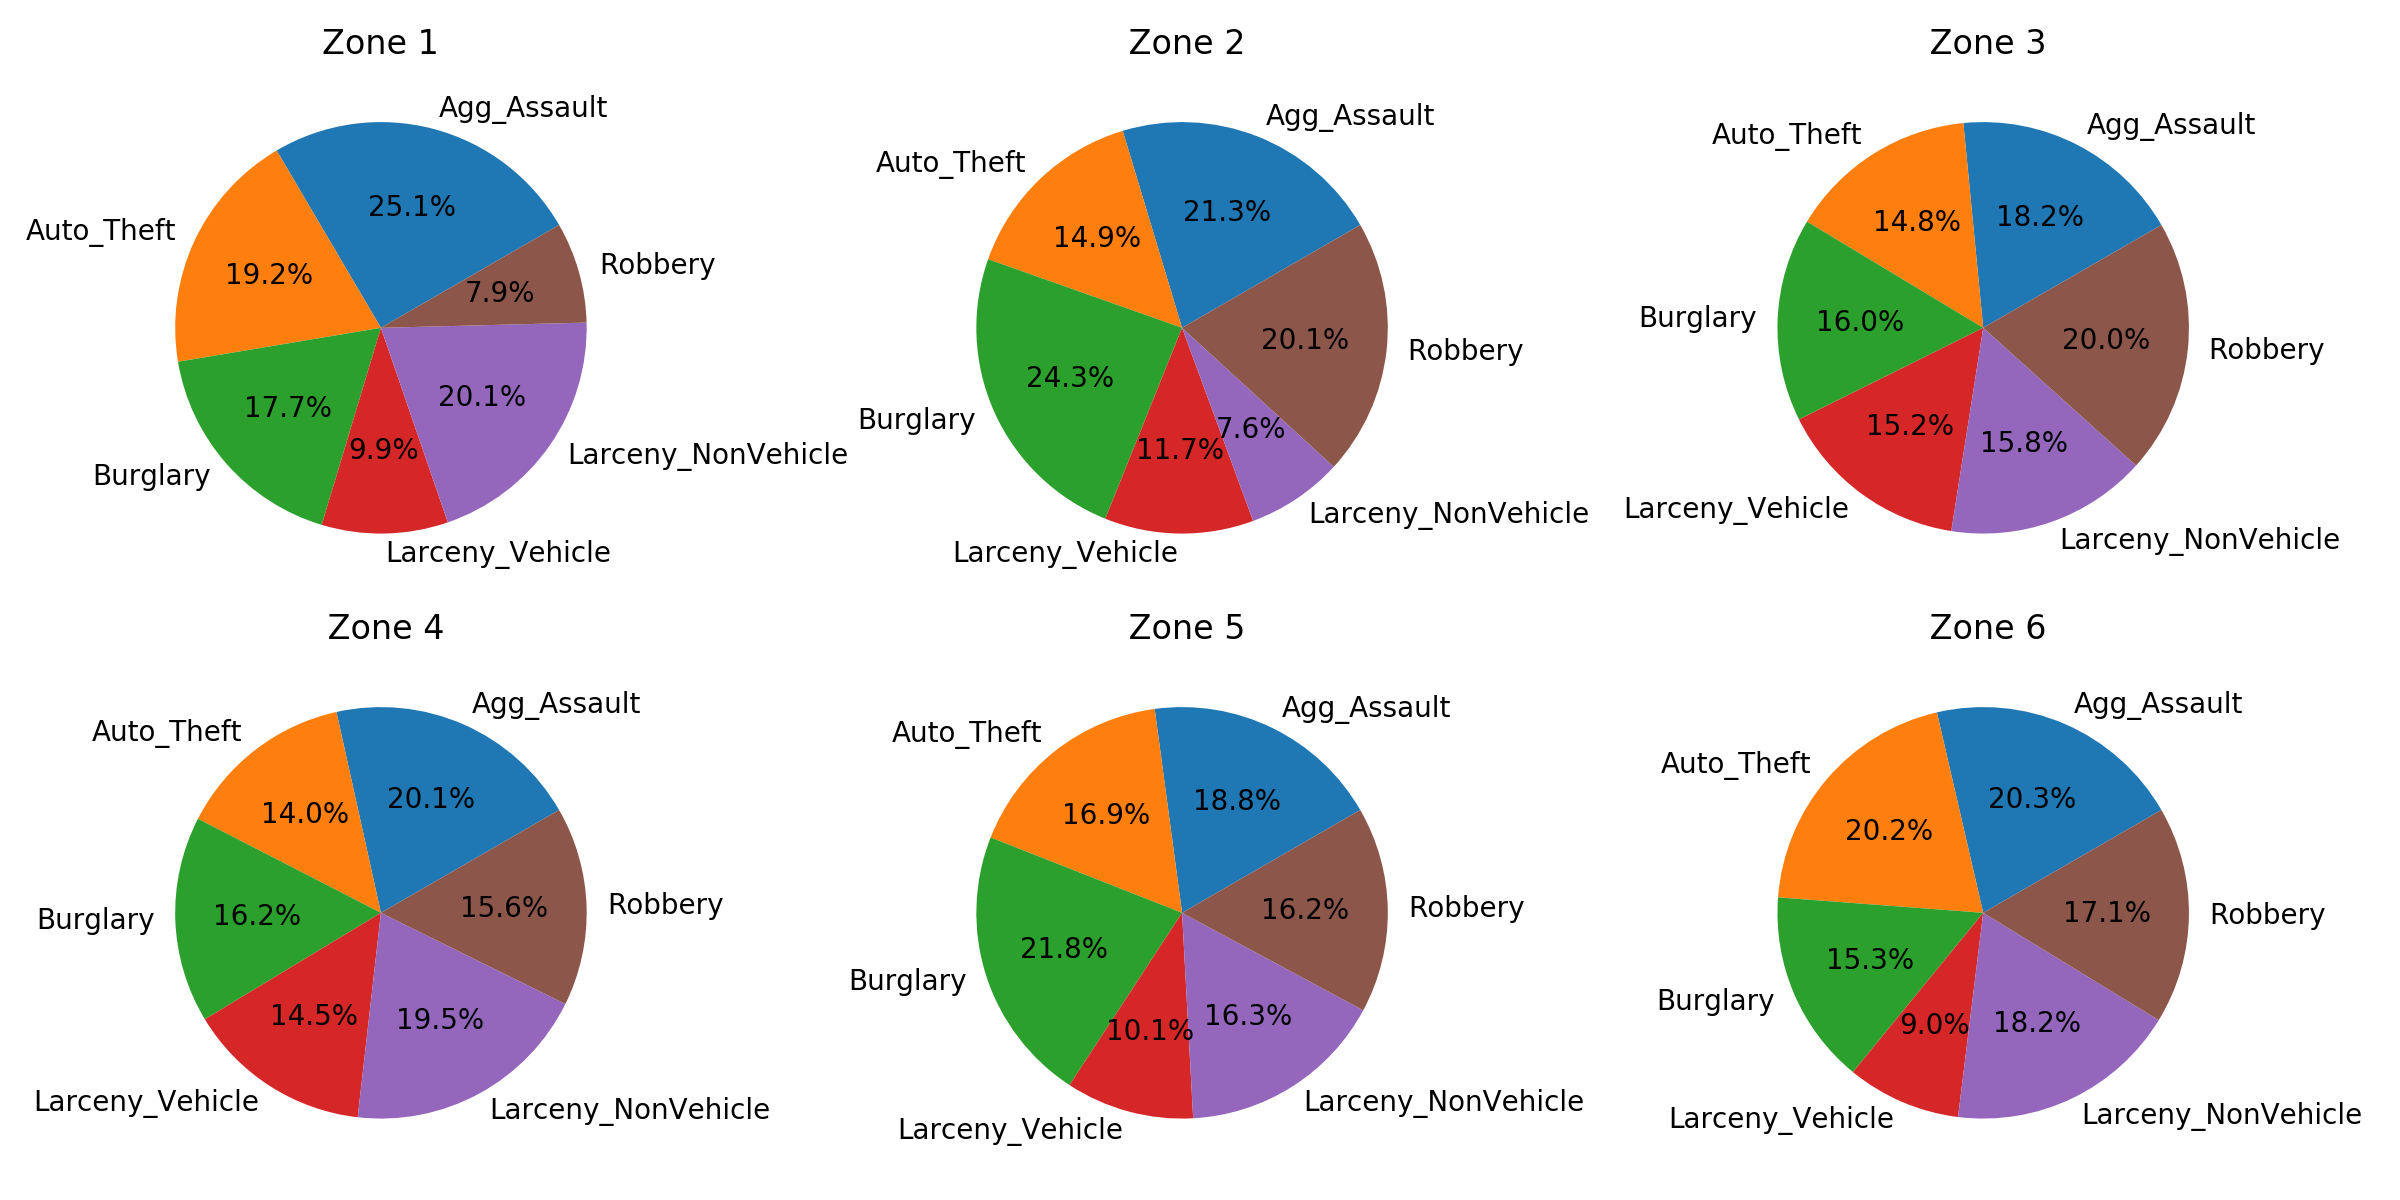

In [245]:
fig, axes = plt.subplots(2, 3, figsize=(12, 6))

for i, (idx, row) in enumerate(zones_df.set_index('Zones').iterrows()):
    ax = axes[i // 3, i % 3]
    row = row[row.gt(row.sum() * .01)]
    ax.pie(row, labels=row.index, startangle=30, autopct='%1.1f%%')
    ax.set_title(idx)

fig.subplots_adjust(wspace=.2)

plt.tight_layout()



In [216]:
# Plot the world average as a line chart
# gca stands for 'get current axis'
##ax = plt.gca()

##per_diff.plot(kind='line', y='Zone 1', color='blue',ax=ax)
##per_diff.plot(kind='line', y='Zone 2', color='red', ax=ax)
##per_diff.plot(kind='line', y='Zone 3', color='green', ax=ax)
##per_diff.plot(kind='line', y='Zone 4', color='gold', ax=ax)
##per_diff.plot(kind='line', y='Zone 5', color='grey', ax=ax)
##per_diff.plot(kind='line', y='Zone 6', color='purple', ax=ax)

##plt.show()



In [178]:
#bar chart
#Bar chart with zones May 2019
##zones_perdiff_chart = per_diff.plot(kind='bar', rot=25)

#labels
##zones_perdiff_chart.set_xlabel("Type of Crimes")
##zones_perdiff_chart.set_ylabel("Total Number of Crimes")
##zones_perdiff_chart.set_title("Percent Difference of Crimes per Zone in Atlanta May 2019 vs May 2020")

##plt.show()
##plt.tight_layout()